<a href="https://colab.research.google.com/github/syejin2004/2024-1-my-BDA/blob/main/inclass/04w_0402_tue_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **빅데이터분석 프로그래밍**

In [2]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [8]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.2 MB/s eta 0:00:00


In [5]:
%config inlineBackend.figure_format = 'retina'

In [9]:
#데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision',2)

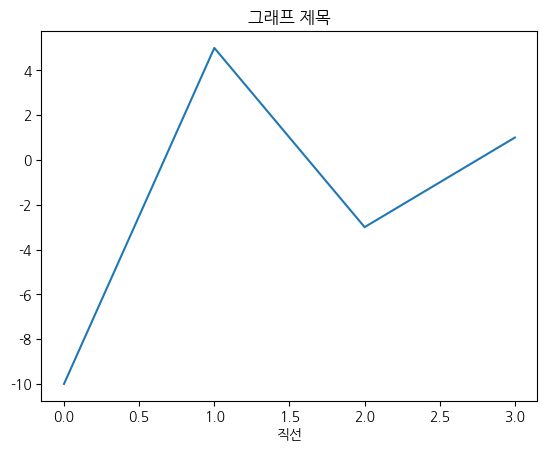

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [7]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.54 MiB/s, done.


In [12]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
6,7,2,80,90,45
0,1,1,50,98,50
17,18,5,80,78,90
14,15,4,75,56,78


## 집단별로 요약하기

### 전체 요약 통계량 구하기

In [13]:
exam.agg('mean') # mean = 평균 구하기

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [15]:
exam.agg(['mean', 'median']) #median=중간값, 여러개의 값을 나열하려면 []기호를 써줘야한다. 데이터 프레임으로 나온다.

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [17]:
exam.agg(mean_math = ('math', 'mean'))    # 변수이름은 설정한대로 나오고 변수이름=('내가 원하고자하는 head이름', '함수이름')

,math
mean_math,57.45


In [18]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [19]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [21]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=0) #시험 예상 axis=0열별로 행 정리

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [20]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=1) #시험예상  axis=1은 행 별로 열 정리

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [22]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']}) #dictionary {열: 적용하는 함수}

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [23]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [24]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [25]:
df.agg('mean')

A    4.0
B    5.0
C    7.0
dtype: float64

In [26]:
df.agg('mean', axis=0)

A    4.0
B    5.0
C    7.0
dtype: float64

In [27]:
df.agg('mean', axis='index')

A    4.0
B    5.0
C    7.0
dtype: float64

In [28]:
df.agg('mean', axis=1)  #axis = 1 == axis = 'colunms'

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [30]:
df.agg(['sum', 'mean'], axis='columns')

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [31]:
df.agg(['sum', 'mean'], axis='index')

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


### 집단별 요약 통계량 구하기

In [32]:
exam.head()    #nclass같은 경우는 범주형이다. 남자/여자, 1반/2반/3반.

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [33]:
exam.groupby('nclass').agg('mean')

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [34]:
exam.groupby('nclass').agg('max')

,id,math,english,science
nclass,,,,
1,4,60,98,78
2,8,90,90,98
3,12,65,98,65
4,16,75,98,78
5,20,89,83,98


In [37]:
exam.groupby('nclass').agg('mean')[['math']]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [38]:
exam.groupby('nclass').agg('mean')[['math', 'english', 'science']]

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [35]:
exam.groupby('nclass').agg(['max', 'min', 'mean'])

id           math            english            science           
       max min  mean  max min   mean     max min   mean     max min   mean
nclass                                                                    
1        4   1   2.5   60  30  46.25      98  86  94.75      78  50  61.50
2        8   5   6.5   90  25  61.25      90  78  84.25      98  25  58.25
3       12   9  10.5   65  20  45.00      98  65  86.50      65  15  39.25
4       16  13  14.5   75  46  56.75      98  56  84.75      78  12  55.00
5       20  17  18.5   89  65  78.00      83  68  74.25      98  58  83.25

In [39]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [40]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [41]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

### 변수를 인덱스로 바꾸지 않기

In [42]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean')) #nclass가 테이블의 인덱스가 된다.

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [44]:
exam.groupby('english').agg(mean_math = ('math', 'mean'))

,mean_math
english,
56,75.00
65,65.00
68,77.00
78,85.00
80,25.00
83,78.00
85,45.00
86,45.00
87,48.00


In [43]:
exam.groupby('nclass', as_index=False).agg(mean_math = ('math', 'mean'))  #nclass 가 인덱스가 되지않고 열 이름으로 오게된다.

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


### DataFrameGroupBy 객체

In [46]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [48]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
list(exam.groupby('nclass'))  #괄호로 묶여져있는거 tuple

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [51]:
list(exam.groupby('nclass'))[0][1] #1반에 해당되는 데이터 프레임이 나옴

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [53]:
list(exam.groupby('nclass'))[1][1] #2반의 데이터 프레임이 나옴

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [57]:
for key, value in exam.groupby('nclass'):
  print(key, '\n')
  print(type(value))
  print(value, '\n', '='*40, '\n')

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65 

5 

<class 'pandas.core.frame.DataFrame'>
    id  ncla

### 여러 요약 통계량 한 번에 구하기

In [59]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [62]:
exam.groupby('nclass')[['math', 'english', 'science']].agg(['mean', 'median'])

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [63]:
exam.groupby('nclass').agg(['mean', 'median'])[['math', 'english', 'science']]

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [65]:
exam.groupby('nclass')['id'].count()  #series

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

In [66]:
exam.groupby('nclass')[['id']].count()  #dataframe

,id
nclass,
1,4
2,4
3,4
4,4
5,4


### 집단별로 다시 집단 나누기

In [68]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [70]:
#제조 회사 및 구동 방식별 분리
#cty 평균구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [71]:
mpg.groupby(['manufacturer', 'drv'])[['cty']].mean()

cty
manufacturer drv       
audi         4    16.82
             f    18.86
chevrolet    4    12.50
             f    18.80
             r    14.10
dodge        4    12.00
             f    15.82
ford         4    13.31
             r    14.75
honda        f    24.44
hyundai      f    18.64
jeep         4    13.50
land rover   4    11.50
lincoln      r    11.33
mercury      4    13.25
nissan       4    13.75
             f    20.00
pontiac      f    17.00
subaru       4    19.29
toyota       4    14.93
             f    21.37
volkswagen   f    20.93

In [72]:
mpg.groupby(['manufacturer', 'drv']).mean()[['cty']]

<ipython-input-72-9b15ef5b7fdd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg.groupby(['manufacturer', 'drv']).mean()[['cty']]


cty
manufacturer drv       
audi         4    16.82
             f    18.86
chevrolet    4    12.50
             f    18.80
             r    14.10
dodge        4    12.00
             f    15.82
ford         4    13.31
             r    14.75
honda        f    24.44
hyundai      f    18.64
jeep         4    13.50
land rover   4    11.50
lincoln      r    11.33
mercury      4    13.25
nissan       4    13.75
             f    20.00
pontiac      f    17.00
subaru       4    19.29
toyota       4    14.93
             f    21.37
volkswagen   f    20.93

In [80]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby(['drv']).agg(count = ('drv', 'count'))

,count
drv,
4,11
f,7


In [77]:
mpg.query('manufacturer == "audi"').groupby('drv').agg(count=('drv', 'count'), mean_cty=('cty', 'mean'))

,count,mean_cty
drv,,
4,11,16.82
f,7,18.86


In [79]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


###`value_counts()`로 집단별 빈도 간단하게 구하기

In [81]:
mpg.groupby('drv').agg(n = ('drv', 'count'))   #dataframe

,n
drv,
4,103
f,106
r,25


In [83]:
mpg[['drv']].value_counts()  #series

drv
f      106
4      103
r       25
dtype: int64

In [84]:
mpg[['drv']].value_counts().to_frame()  #dataframe

,0
drv,
f,106
4,103
r,25


In [85]:
mpg[['drv', 'cyl']].value_counts() #series

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [86]:
mpg[['drv', 'cyl']].value_counts().to_frame()  #dataframe

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [88]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


### `pandas` 함수 조합하기

In [89]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56


In [90]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


### 혼자서 해보기

In [91]:
# 시험 예상
mpg.groupby(['manufacturer', 'category']) \
  .agg(mean_cty = ('cty', 'mean')) \
  .sort_values('mean_cty', ascending = False)

mean_cty
manufacturer category            
honda        subcompact     24.44
volkswagen   subcompact     24.00
toyota       compact        22.25
volkswagen   compact        20.79
nissan       compact        20.00
             midsize        20.00
toyota       midsize        19.86
subaru       compact        19.75
             subcompact     19.50
hyundai      midsize        19.00
subaru       suv            18.83
chevrolet    midsize        18.80
volkswagen   midsize        18.57
hyundai      subcompact     18.29
audi         compact        17.93
pontiac      midsize        17.00
audi         midsize        16.00
ford         subcompact     15.89
dodge        minivan        15.82
toyota       pickup         15.57
chevrolet    2seater        15.40
toyota       suv            14.38
nissan       suv            13.75
jeep         suv            13.50
mercury      suv            13.25
ford         pickup         13.00
             suv            12.89
chevrolet    suv            12.67
dodge        pickup         12.05
             suv            11.86
land rover   suv            11.50
lincoln      suv            11.33

## 데이터 합치기

In [92]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [93]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [94]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [95]:
pd.merge(test1, test2)

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [96]:
pd.merge(test1, test2, how= 'inner', on = 'id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


## 다른 데이터를 활용해 변수 추가하기

In [97]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [99]:
pd.merge(exam, name)

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [100]:
pd.merge(exam, name, how = 'inner', on = 'nclass')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [101]:
pd.merge(exam, name, how = 'left', on = 'nclass')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 병합 방식이 inner, left 등이 있다. left랑 inner의 차이는 크지 않다.

## 세로로 합치기: concat()

In [102]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [103]:
group_a

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [104]:
group_b

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [107]:
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [108]:
group_all.reset_index()  # 원 index가 열로 이동, 새로운 시퀀스 지정

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [109]:
group_all.reset_index(drop=True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


## 심화학습: 공식 매뉴얼 문서


In [110]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [111]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [112]:
# key 및 rkey 열에 df1 및 df2를 병합, 공통 키가 다른 경우
# 값 열에는 기본 접미사인 _x 및 _y가 추가
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [113]:
# 겹치는 열에 지정된 왼쪽 및 오른쪽 접미사를 추가하여 DataFrames df1 및 df2를 병합 .
df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


## 정리하기

In [115]:

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80
